In [1]:
def warn(*args, **kargs):
    pass
import warnings
warnings.warn = warn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/Wine_Quality_Data.csv")
data.head(4).T

,0,1,2,3
fixed_acidity,7.4,7.8,7.8,11.2
volatile_acidity,0.7,0.88,0.76,0.28
citric_acid,0.0,0.0,0.04,0.56
residual_sugar,1.9,2.6,2.3,1.9
chlorides,0.076,0.098,0.092,0.075
free_sulfur_dioxide,11.0,25.0,15.0,17.0
total_sulfur_dioxide,34.0,67.0,54.0,60.0
density,0.9978,0.9968,0.997,0.998
pH,3.51,3.2,3.26,3.16
sulphates,0.56,0.68,0.65,0.58


In [3]:
data.shape

(6497, 13)

In [4]:
data.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

In [5]:
data.color.value_counts()

white    4898
red      1599
Name: color, dtype: int64

In [6]:
data.quality.value_counts().sort_index()

3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64

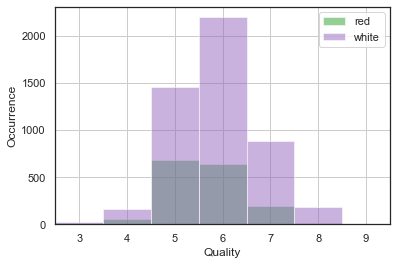

In [7]:
sns.set_context("notebook")
sns.set_style("white")

red = sns.color_palette()[2]
white = sns.color_palette()[4]

bin_range = np.array([3,4,5,6,7,8,9])

ax = plt.axes()

for color, plot_color in zip(["red", "white"] , [red, white]):
    q_data = data.loc[data.color==color, 'quality']
    q_data.hist(bins=bin_range, alpha=0.5, ax=ax, color=plot_color,label=color)


ax.legend()
ax.set(xlabel = 'Quality', ylabel = 'Occurrence')
ax.set_xlim(3,10)
ax.set_xticks(bin_range+0.5)
ax.set_xticklabels(bin_range);
ax.grid('off')



In [8]:
# perfrom feature scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
float_columns = [x for x in data.columns if x not in ['color', 'quality']]
data[float_columns] = sc.fit_transform(data[float_columns])
data.head(4)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,5,red
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,5,red
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,5,red
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,6,red


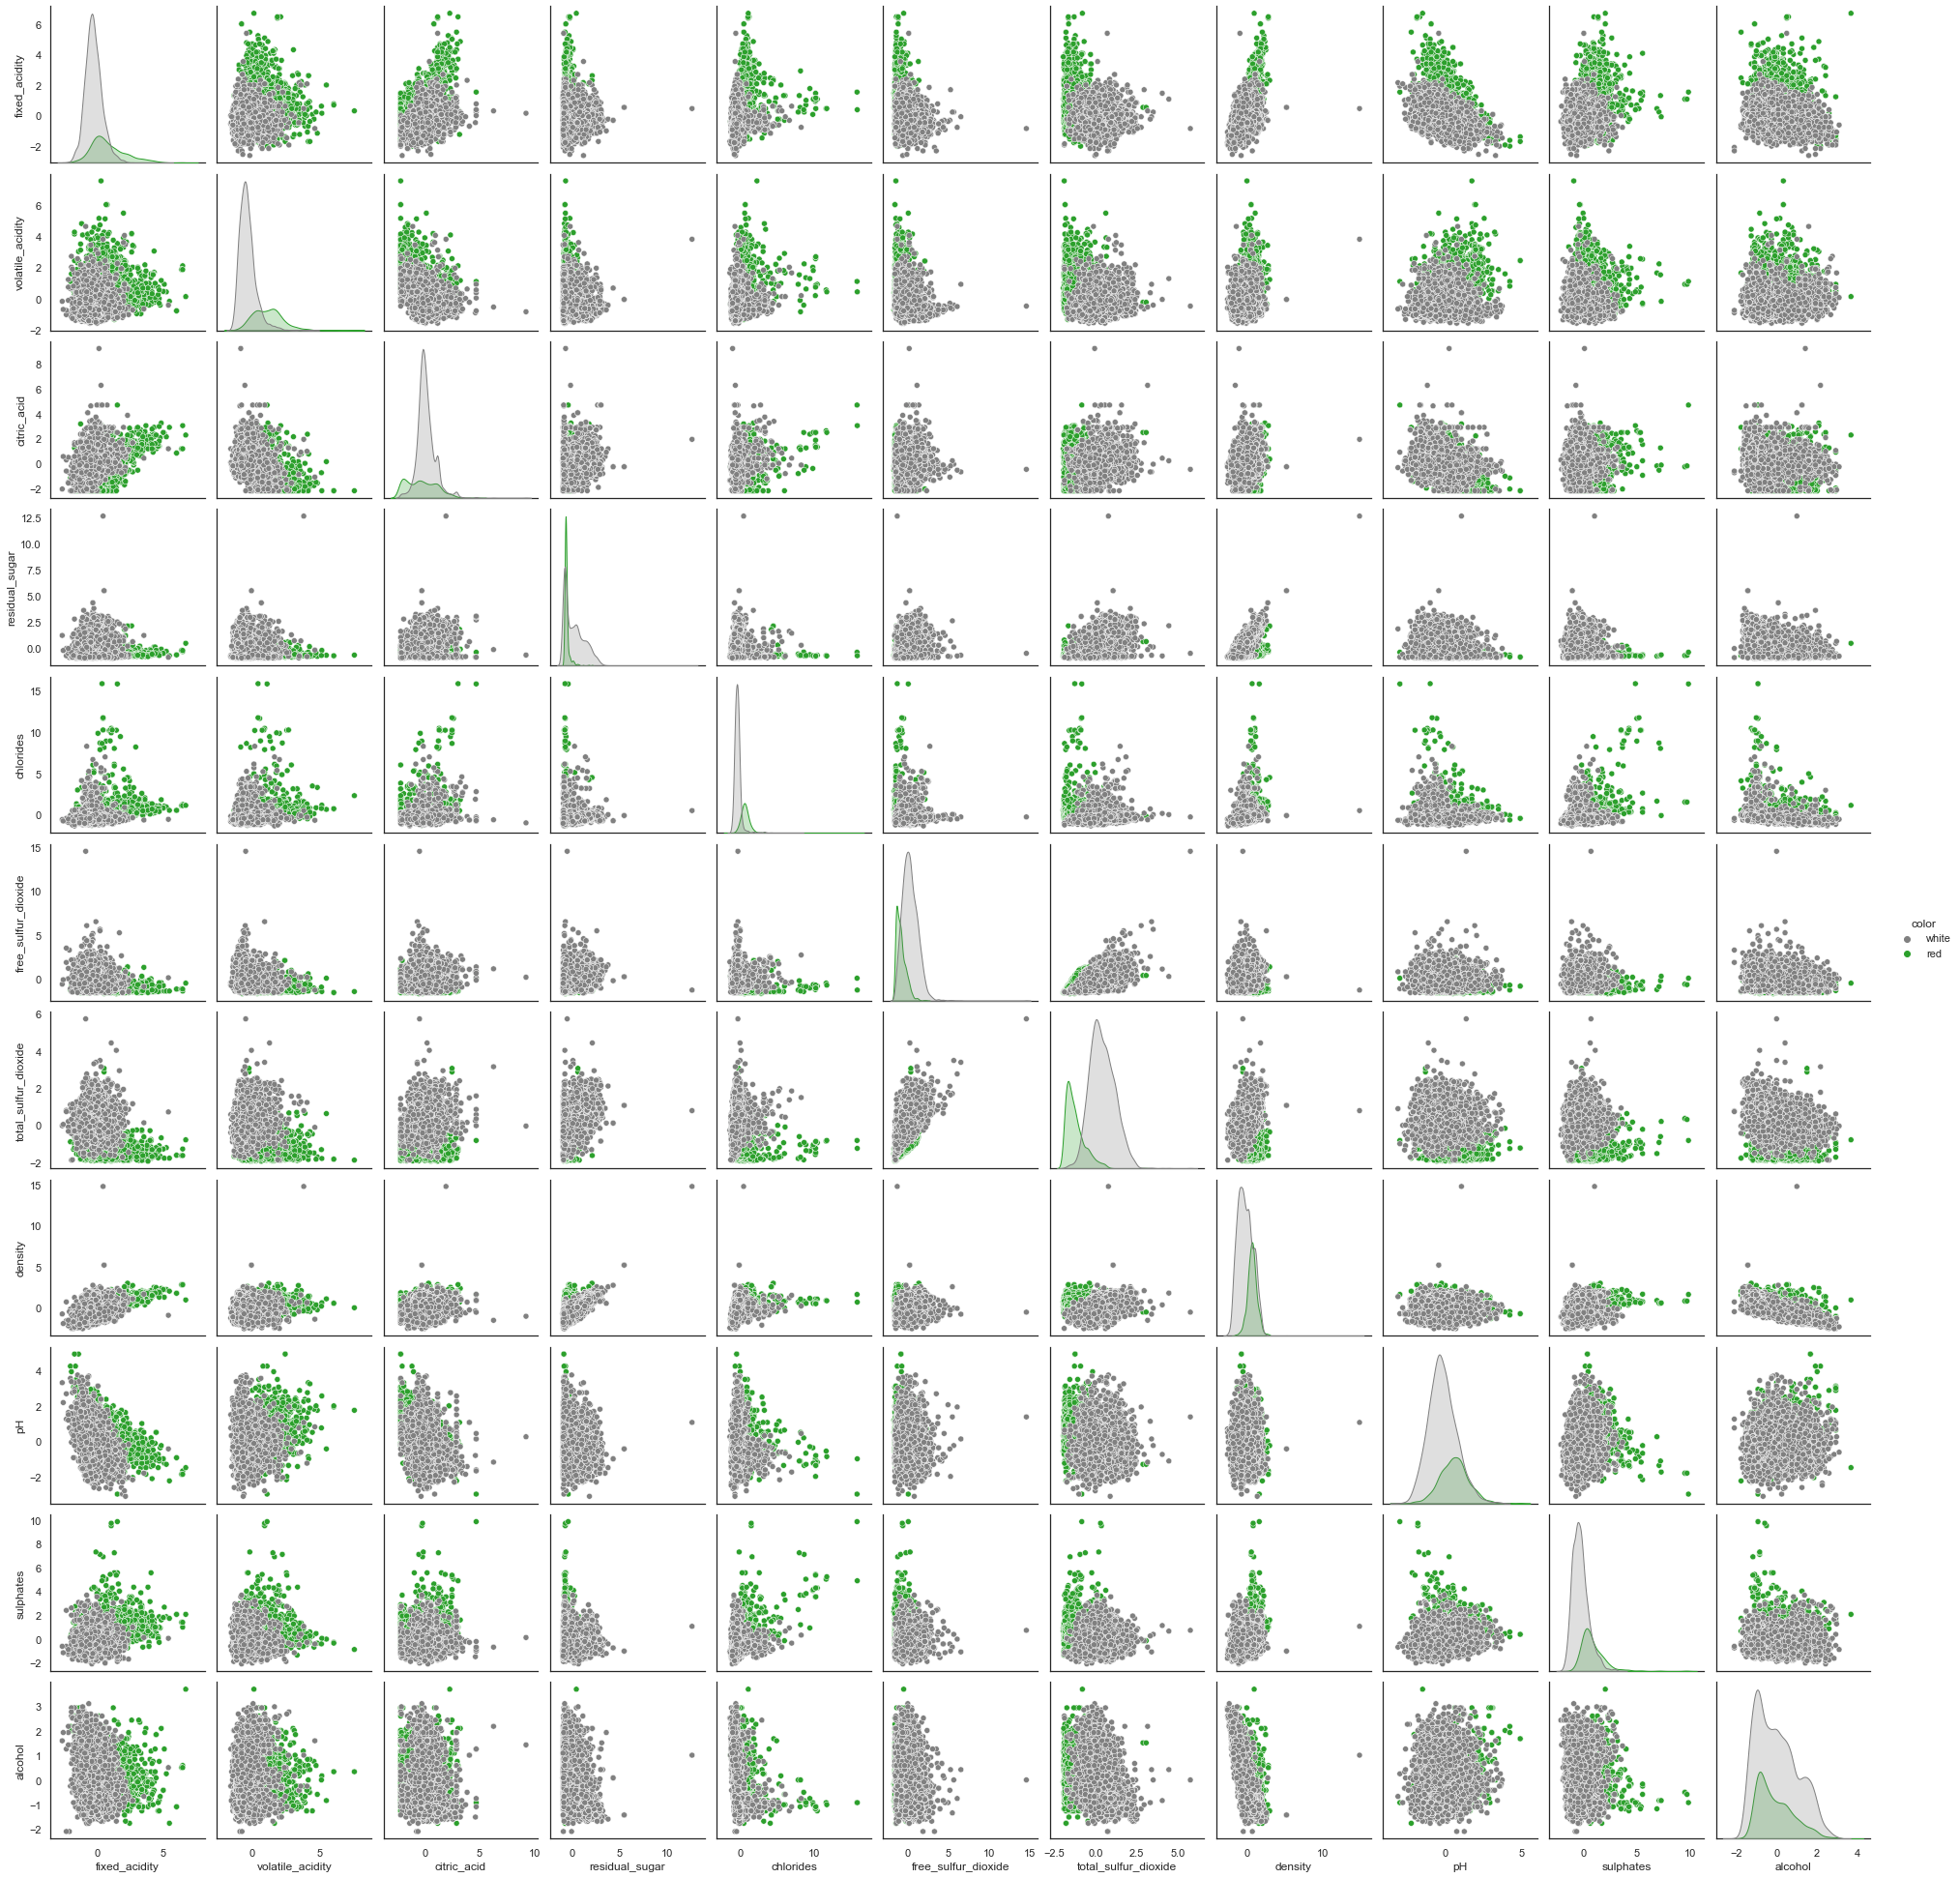

In [9]:
sns.set_context('notebook')
sns.pairplot(data[float_columns + ['color']],
             hue='color',
             hue_order= ['white', 'red'],
             palette={'red':red, 'white':'gray'});

In [10]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2,random_state=42)
km = km.fit(data[float_columns])

data['kmeans'] = km.predict(data[float_columns])


In [11]:
(data[['color', 'kmeans']].groupby(['kmeans','color']).size().to_frame().rename(columns={0:'number'}))

number
kmeans color        
0      red        24
       white    4831
1      red      1575
       white      67

In [12]:
km_list = list()

for clust in range(1,21):
    km = KMeans(n_clusters=clust, random_state=42)
    km = km.fit(data[float_columns])
    km_list.append(pd.Series({'clusters': clust,
                                'inertia': km.inertia_,
                                'model': km}))     

[Text(0.5, 0, 'Cluster'), Text(0, 0.5, 'Inertia')]

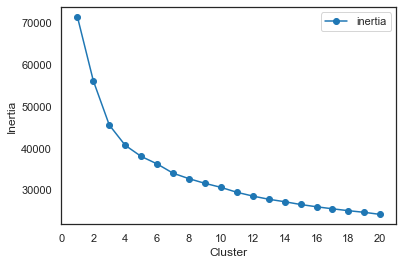

In [13]:
plot_data = (pd.concat(km_list, axis=1).T [['clusters','inertia']].set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,21,2))
ax.set_xlim(0,21)
ax.set(xlabel='Cluster', ylabel = 'Inertia')